In [1]:
#Importando bibliotecas

from scipy.integrate import odeint
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Parâmetros oficiais NBA

r=0.115 #Raio
m=0.567 #Massa
p=1.225 #Densidade do ar
Cd=0.54 #Drag coefficient para bolas de basquete
A=math.pi*(r**2) #Área bola
Cl=0.0053 #Lift coefficient
g=9.8 #Gravidade
w=26 #Velocidade angular
Vo=8.325 #Média da velocidade de um arremesso de basquete de 3 pontos para angulo de 45
angulo=math.radians(45) #Angulo perfeito para máxima eficiência

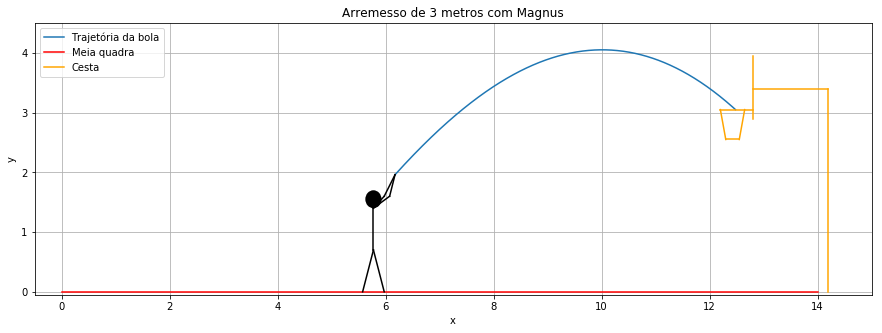

In [3]:
# Gráfico

dt=1e-3
listatempo=np.arange(0, 15, dt)

def EqDifs(listaSol, t):
    x=listaSol[0]
    y=listaSol[1]
    vx=listaSol[2]
    vy=listaSol[3]
    
    v=math.sqrt(vx**2+vy**2)
    
    dxdt=vx
    dydt=vy
    dvxdt=-(1/m)*(1/2)*p*Cd*A*(v**2)*(vx/(v))
    dvydt=(1/m)*(((1/2)*p*Cl*A*(v**3)*w)-((1/2)*p*Cd*A*(v**2)*(vy/(v))))-g
    
    if y <=0:
        dxdt=0
        dydt=0
        dvxdt=0
        dvydt=0
    
    if y<3.05 and x>12.2:
        dxdt=0
        dydt=0
        dvxdt=0
        dvydt=0
            
    return [dxdt, dydt, dvxdt, dvydt]

c0=[6.175, 1.96, Vo*math.cos(angulo), Vo*math.sin(angulo)]
S=odeint(EqDifs, c0, listatempo)

Xm=S[:, 0]
Ym=S[:, 1]

plt.figure(figsize=(15,5))
plt.plot(Xm, Ym, label='Trajetória da bola')
plt.plot([0, 14], [0, 0], 'red',label='Meia quadra')
plt.plot([14.2, 14.2], [0, 3.4], 'orange', label='Cesta')
plt.plot([12.8, 14.2], [3.4, 3.4], 'orange')
plt.plot([12.8, 12.8], [2.9, 3.95], 'orange')
plt.plot([12.2, 12.8], [3.05, 3.05], 'orange')
plt.plot([12.2, 12.3], [3.05, 2.55], 'orange')
plt.plot([12.65, 12.55], [3.05, 2.55], 'orange')
plt.plot([12.3, 12.55], [2.55, 2.55], 'orange')
plt.plot([5.975, 5.775], [0, 0.7], color='black')
plt.plot([5.575, 5.775], [0, 0.7], color='black')
plt.plot([5.775, 5.775], [0.7, 1.4], color='black')
plt.plot([5.775, 5.975], [1.4, 1.6], color='black')
plt.plot([5.975, 6.175], [1.6, 1.96], color='black')
plt.plot([5.775, 6.075], [1.4, 1.6], color='black')
plt.plot([6.075, 6.175], [1.6, 1.96], color='black')
circle = plt.Circle((5.775, 1.55), radius=0.15, fc='black')
ax=plt.gca()
ax.set_ylim([-0.05, 4.5])
ax.set_xlim([-0.5,15])
plt.gca().add_patch(circle)
plt.title('Arremesso de 3 metros com Magnus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Validação (com magnus)

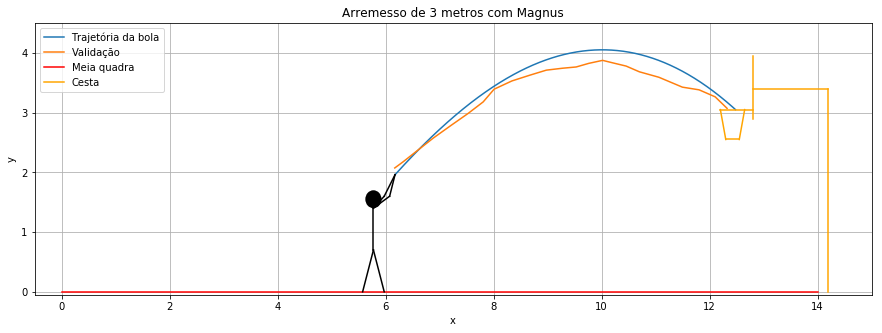

In [73]:
lisValX=[6.17012030016781887,
6.3296080815751483,
6.5528909755454103,
6.8824990571205591,
7.212107138695707,
7.5310827015103672,
7.807528189283072,
8.0095460457323564,
8.3391541273075043,
8.668762208882653,
8.977105252936824,
9.2748157782305065,
9.529996228482234,
9.7639116412129847,
10.019092091464712,
10.210477429153508,
10.455025360644749,
10.699573292135986,
11.0610789299926005,
11.4970121991726355,
11.805355243226806,
12.103065768520489,
12.3241290301]

lisValY=[2.073341158295288,
2.179666345900175,
2.3391541273075043,
2.573069540038255,
2.785719915248028,
2.9877377716973124,
3.1791231093861088,
3.391773484595882,
3.5299962284822346,
3.625688897326632,
3.7107490474105416,
3.742646603692007,
3.7639116412129847,
3.8245441599734733,
3.8745441599734733,
3.8320140849315186,
3.7788514911290755,
3.6831588222846777,
3.591773484595882,
3.4259605155836656,
3.381412584092426,
3.26431898402060737,
3.0712392013918]

plt.figure(figsize=(15,5))
plt.plot(Xm, Ym, label='Trajetória da bola')
plt.plot(lisValX, lisValY, label='Validação')
plt.plot([0, 14], [0, 0], 'red',label='Meia quadra')
plt.plot([14.2, 14.2], [0, 3.4], 'orange', label='Cesta')
plt.plot([12.8, 14.2], [3.4, 3.4], 'orange')
plt.plot([12.8, 12.8], [2.9, 3.95], 'orange')
plt.plot([12.2, 12.8], [3.05, 3.05], 'orange')
plt.plot([12.2, 12.3], [3.05, 2.55], 'orange')
plt.plot([12.65, 12.55], [3.05, 2.55], 'orange')
plt.plot([12.3, 12.55], [2.55, 2.55], 'orange')
plt.plot([5.975, 5.775], [0, 0.7], color='black')
plt.plot([5.575, 5.775], [0, 0.7], color='black')
plt.plot([5.775, 5.775], [0.7, 1.4], color='black')
plt.plot([5.775, 5.975], [1.4, 1.6], color='black')
plt.plot([5.975, 6.175], [1.6, 1.96], color='black')
plt.plot([5.775, 6.075], [1.4, 1.6], color='black')
plt.plot([6.075, 6.175], [1.6, 1.96], color='black')
circle = plt.Circle((5.775, 1.55), radius=0.15, fc='black')
ax=plt.gca()
ax.set_ylim([-0.05, 4.5])
ax.set_xlim([-0.5,15])
plt.gca().add_patch(circle)
plt.title('Arremesso de 3 metros com Magnus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Sem efeito Magnus

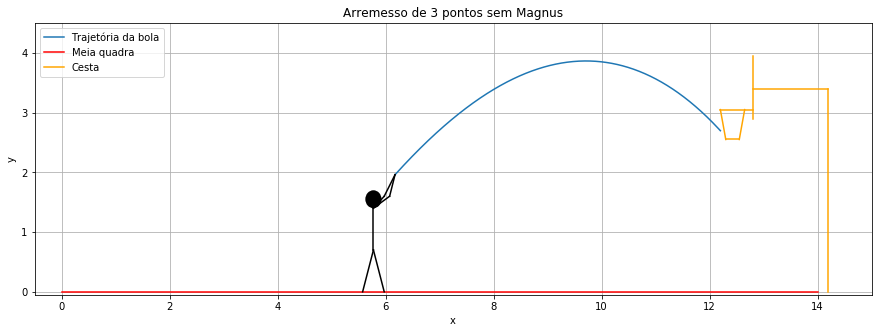

In [4]:
# Gráfico

dt=1e-3
listatempo=np.arange(0, 15, dt)

def EqDifs(listaSol, t):
    x=listaSol[0]
    y=listaSol[1]
    vx=listaSol[2]
    vy=listaSol[3]
    
    v=math.sqrt(vx**2+vy**2)
    
    dxdt=vx
    dydt=vy
    dvxdt=-(1/m)*(1/2)*p*Cd*A*(v**2)*(vx/(v))
    dvydt=(1/m)*((1/2)*p*Cd*A*(v**2)*(vy/(v)))-g
    
    if y <=0:
        dxdt=0
        dydt=0
        dvxdt=0
        dvydt=0
    
    if y<3.05 and x>12.2:
        dxdt=0
        dydt=0
        dvxdt=0
        dvydt=0
            
    return [dxdt, dydt, dvxdt, dvydt]

c0=[6.175, 1.96, Vo*math.cos(angulo), Vo*math.sin(angulo)]
S=odeint(EqDifs, c0, listatempo)

X=S[:, 0]
Y=S[:, 1]

plt.figure(figsize=(15,5))
plt.plot(X, Y, label='Trajetória da bola')
plt.plot([0, 14], [0, 0], 'red',label='Meia quadra')
plt.plot([14.2, 14.2], [0, 3.4], 'orange', label='Cesta')
plt.plot([12.8, 14.2], [3.4, 3.4], 'orange')
plt.plot([12.8, 12.8], [2.9, 3.95], 'orange')
plt.plot([12.2, 12.8], [3.05, 3.05], 'orange')
plt.plot([12.2, 12.3], [3.05, 2.55], 'orange')
plt.plot([12.65, 12.55], [3.05, 2.55], 'orange')
plt.plot([12.3, 12.55], [2.55, 2.55], 'orange')
plt.plot([5.975, 5.775], [0, 0.7], color='black')
plt.plot([5.575, 5.775], [0, 0.7], color='black')
plt.plot([5.775, 5.775], [0.7, 1.4], color='black')
plt.plot([5.775, 5.975], [1.4, 1.6], color='black')
plt.plot([5.975, 6.175], [1.6, 1.96], color='black')
plt.plot([5.775, 6.075], [1.4, 1.6], color='black')
plt.plot([6.075, 6.175], [1.6, 1.96], color='black')
circle = plt.Circle((5.775, 1.55), radius=0.15, fc='black')
ax=plt.gca()
ax.set_ylim([-0.05, 4.5])
ax.set_xlim([-0.5,15])
plt.gca().add_patch(circle)
plt.title('Arremesso de 3 pontos sem Magnus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

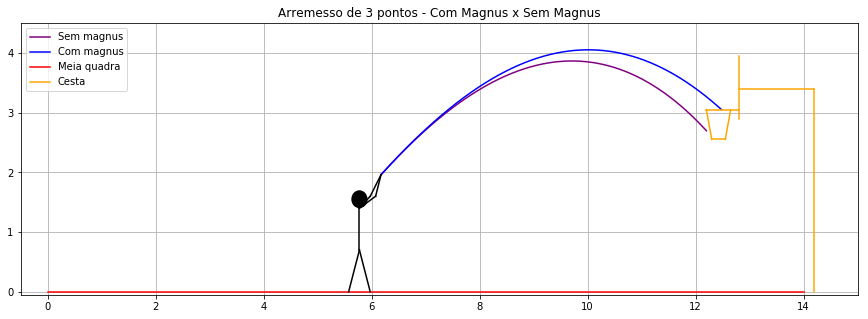

In [5]:
#plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.plot(X, Y, label='Sem magnus', color='purple')
plt.plot(Xm, Ym, label='Com magnus', color='blue')
plt.plot([0, 14], [0, 0], 'red',label='Meia quadra')
plt.plot([14.2, 14.2], [0, 3.4], 'orange', label='Cesta')
plt.plot([12.8, 14.2], [3.4, 3.4], 'orange')
plt.plot([12.8, 12.8], [2.9, 3.95], 'orange')
plt.plot([12.2, 12.8], [3.05, 3.05], 'orange')
plt.plot([12.2, 12.3], [3.05, 2.55], 'orange')
plt.plot([12.65, 12.55], [3.05, 2.55], 'orange')
plt.plot([12.3, 12.55], [2.55, 2.55], 'orange')
plt.plot([5.975, 5.775], [0, 0.7], color='black')
plt.plot([5.575, 5.775], [0, 0.7], color='black')
plt.plot([5.775, 5.775], [0.7, 1.4], color='black')
plt.plot([5.775, 5.975], [1.4, 1.6], color='black')
plt.plot([5.975, 6.175], [1.6, 1.96], color='black')
plt.plot([5.775, 6.075], [1.4, 1.6], color='black')
plt.plot([6.075, 6.175], [1.6, 1.96], color='black')
circle = plt.Circle((5.775, 1.55), radius=0.15, fc='black')
ax=plt.gca()
ax.set_ylim([-0.05, 4.5])
ax.set_xlim([-0.5,15])
plt.gca().add_patch(circle)
plt.title('Arremesso de 3 pontos - Com Magnus x Sem Magnus')
plt.grid(True)
plt.legend()
plt.show()

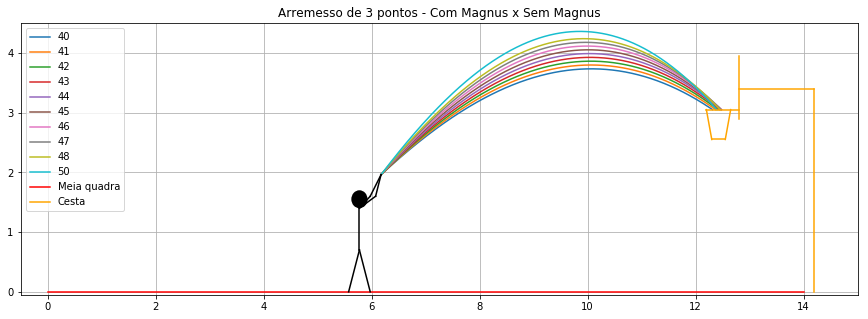

In [6]:
def EqDifs(listaSol, t):
    x=listaSol[0]
    y=listaSol[1]
    vx=listaSol[2]
    vy=listaSol[3]
    
    v=math.sqrt(vx**2+vy**2)
    
    dxdt=vx
    dydt=vy
    dvxdt=-(1/m)*(1/2)*p*Cd*A*(v**2)*(vx/(v))
    dvydt=(1/m)*(((1/2)*p*Cl*A*(v**3)*w)-((1/2)*p*Cd*A*(v**2)*(vy/(v))))-g
    
    if y <=0:
        dxdt=0
        dydt=0
        dvxdt=0
        dvydt=0
    
    if y<3.05 and x>12.2:
        dxdt=0
        dydt=0
        dvxdt=0
        dvydt=0
            
    return [dxdt, dydt, dvxdt, dvydt]

c0=[6.175, 1.96, Vo*math.cos(angulo), Vo*math.sin(angulo)]
S=odeint(EqDifs, c0, listatempo)

#######################################################################################################################

plt.figure(figsize=(15,5))

listaTeta=[40, 41, 42, 43, 44, 45, 46, 47, 48, 50]
listaDistancia=[]

for teta in listaTeta:
    angulo=math.radians(teta)
    c0=[6.175, 1.96, Vo*math.cos(angulo), Vo*math.sin(angulo)]
    S=odeint(EqDifs, c0, listatempo)
    plt.plot(S[:, 0], S[:, 1], label='{}'.format(teta))
    listaDistancia.append(S[:, 0][len(listatempo)-1])
    
plt.plot([0, 14], [0, 0], 'red',label='Meia quadra')
plt.plot([14.2, 14.2], [0, 3.4], 'orange', label='Cesta')
plt.plot([12.8, 14.2], [3.4, 3.4], 'orange')
plt.plot([12.8, 12.8], [2.9, 3.95], 'orange')
plt.plot([12.2, 12.8], [3.05, 3.05], 'orange')
plt.plot([12.2, 12.3], [3.05, 2.55], 'orange')
plt.plot([12.65, 12.55], [3.05, 2.55], 'orange')
plt.plot([12.3, 12.55], [2.55, 2.55], 'orange')
plt.plot([5.975, 5.775], [0, 0.7], color='black')
plt.plot([5.575, 5.775], [0, 0.7], color='black')
plt.plot([5.775, 5.775], [0.7, 1.4], color='black')
plt.plot([5.775, 5.975], [1.4, 1.6], color='black')
plt.plot([5.975, 6.175], [1.6, 1.96], color='black')
plt.plot([5.775, 6.075], [1.4, 1.6], color='black')
plt.plot([6.075, 6.175], [1.6, 1.96], color='black')
circle = plt.Circle((5.775, 1.55), radius=0.15, fc='black')
ax=plt.gca()
ax.set_ylim([-0.05, 4.5])
ax.set_xlim([-0.5,15])
plt.gca().add_patch(circle)
plt.title('Arremesso de 3 pontos - Com Magnus x Sem Magnus')
plt.grid(True)
plt.legend()
plt.show()

In [51]:
xmax=12.65
xmin=12.2

listaSucesso=[]
listaSemSucesso=[]

for d in listaDistancia:
    if (d+r)<xmax and (d-r)>xmin:
        listaSucesso.append(d)
    else:
        listaSemSucesso.append(d)

### Gráfico Conclusivo

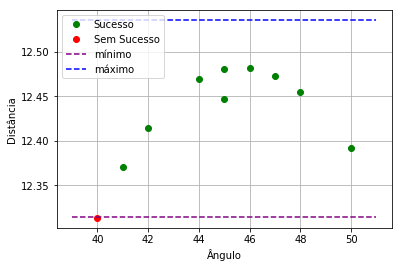

In [52]:
plt.plot(listaTetaSucesso, listaSucesso,'go',label='Sucesso')
plt.plot(listaTetaSemSucesso, listaSemSucesso,'ro',label='Sem Sucesso')
plt.plot([39, 51], [12.315, 12.315], color='purple', linestyle='dashed', label='mínimo')
plt.plot([39, 51], [12.535, 12.535], 'b--', label='máximo')
plt.legend(loc='upper left')
plt.xlabel('Ângulo')
plt.ylabel('Distância')
plt.grid(True)
plt.show()